In [1]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.svm import SVR
import tensorflow as tf
import pandas as pd
import numpy as np
import math


path = "/content/drive/MyDrive/Colab Notebooks/Weather Forcast/Datasets/NASA_Hour.csv"
df = pd.read_csv(path)

In [2]:
df

,Year,Month,Day,Time,Temperature,Humidity,Pressure,Direction,WindSpeed
0,2018,1,1,0,21.40,81.75,100.88,337.53,2.00
1,2018,1,1,1,20.89,84.94,100.84,347.71,2.42
2,2018,1,1,2,20.41,87.69,100.80,355.02,2.79
3,2018,1,1,3,20.05,89.56,100.79,359.69,2.89
4,2018,1,1,4,19.78,90.44,100.81,1.58,2.84
...,...,...,...,...,...,...,...,...,...
28459,2021,3,31,19,27.18,85.69,99.85,166.18,6.90
28460,2021,3,31,20,26.94,87.50,99.92,161.50,6.90
28461,2021,3,31,21,26.80,88.31,99.96,160.32,6.96
28462,2021,3,31,22,26.80,88.31,99.97,161.86,7.10


In [3]:
y = list(df["Year"])
m = list(df["Month"])
d = list(df["Day"])
h = list(df["Time"])

time=[]
for i in range(0, len(h)):
  time.append(pd.Timestamp(y[i], m[i], d[i], h[i]))

df['Date']= time

In [4]:
df = df.drop(['Year', 'Month', 'Day', 'Time'], axis =1)

In [5]:
df

,Temperature,Humidity,Pressure,Direction,WindSpeed,Date
0,21.40,81.75,100.88,337.53,2.00,2018-01-01 00:00:00
1,20.89,84.94,100.84,347.71,2.42,2018-01-01 01:00:00
2,20.41,87.69,100.80,355.02,2.79,2018-01-01 02:00:00
3,20.05,89.56,100.79,359.69,2.89,2018-01-01 03:00:00
4,19.78,90.44,100.81,1.58,2.84,2018-01-01 04:00:00
...,...,...,...,...,...,...
28459,27.18,85.69,99.85,166.18,6.90,2021-03-31 19:00:00
28460,26.94,87.50,99.92,161.50,6.90,2021-03-31 20:00:00
28461,26.80,88.31,99.96,160.32,6.96,2021-03-31 21:00:00
28462,26.80,88.31,99.97,161.86,7.10,2021-03-31 22:00:00


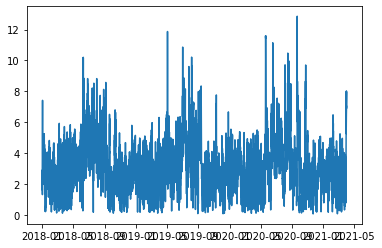

In [6]:
plt.plot(df['Date'], df['WindSpeed'])

In [7]:
df['TomorrowSpeed'] = df.WindSpeed.shift(-1, fill_value= math.nan)

In [8]:
cols = ['Date', 'Humidity', 'Pressure', 'Temperature', 'Direction', 'WindSpeed', 'TomorrowSpeed']
df = df[cols]
df

,Date,Humidity,Pressure,Temperature,Direction,WindSpeed,TomorrowSpeed
0,2018-01-01 00:00:00,81.75,100.88,21.40,337.53,2.00,2.42
1,2018-01-01 01:00:00,84.94,100.84,20.89,347.71,2.42,2.79
2,2018-01-01 02:00:00,87.69,100.80,20.41,355.02,2.79,2.89
3,2018-01-01 03:00:00,89.56,100.79,20.05,359.69,2.89,2.84
4,2018-01-01 04:00:00,90.44,100.81,19.78,1.58,2.84,2.73
...,...,...,...,...,...,...,...
28459,2021-03-31 19:00:00,85.69,99.85,27.18,166.18,6.90,6.90
28460,2021-03-31 20:00:00,87.50,99.92,26.94,161.50,6.90,6.96
28461,2021-03-31 21:00:00,88.31,99.96,26.80,160.32,6.96,7.10
28462,2021-03-31 22:00:00,88.31,99.97,26.80,161.86,7.10,7.02


In [9]:
NaN_index = df.index[pd.isnull(df['TomorrowSpeed'])].tolist()

df = df.drop(NaN_index)

In [10]:
pd.isnull(df).any(1)

0        False
1        False
2        False
3        False
4        False
         ...  
28458    False
28459    False
28460    False
28461    False
28462    False
Length: 28463, dtype: bool

In [11]:
df

,Date,Humidity,Pressure,Temperature,Direction,WindSpeed,TomorrowSpeed
0,2018-01-01 00:00:00,81.75,100.88,21.40,337.53,2.00,2.42
1,2018-01-01 01:00:00,84.94,100.84,20.89,347.71,2.42,2.79
2,2018-01-01 02:00:00,87.69,100.80,20.41,355.02,2.79,2.89
3,2018-01-01 03:00:00,89.56,100.79,20.05,359.69,2.89,2.84
4,2018-01-01 04:00:00,90.44,100.81,19.78,1.58,2.84,2.73
...,...,...,...,...,...,...,...
28458,2021-03-31 18:00:00,82.44,99.78,27.58,171.45,6.88,6.90
28459,2021-03-31 19:00:00,85.69,99.85,27.18,166.18,6.90,6.90
28460,2021-03-31 20:00:00,87.50,99.92,26.94,161.50,6.90,6.96
28461,2021-03-31 21:00:00,88.31,99.96,26.80,160.32,6.96,7.10


In [12]:
X = df.iloc[:, 1:6].values 
Y = df.iloc[:, 6].values
date = df.iloc[-100:, 0]

X_train, X_validation, y_train, y_validation = train_test_split(X, Y, test_size = 0.2, shuffle =False, random_state = 0)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation, y_validation, test_size = 0.0175, shuffle =False, random_state = 0)

#3 hour gape -> train,validation,test = 7589,1798,100
#Per hour gape -> train,validation,test = 22777,5593,100

print(len(X_train))
print(len(X_validation))
print(len(X_test))

22770
5593
100


In [13]:
scaler = preprocessing.RobustScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

In [14]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    X_train,
    y_train,
    sequence_length = 1,
    batch_size=32,
    shuffle=False
)
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    X_validation,
    y_validation,
    sequence_length = 1,
    batch_size=32,
    shuffle=False
)
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
outputs = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(outputs)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Input shape: (32, 1, 5)
Target shape: (32,)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 5)]            0         
                                                                 
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


In [15]:
path_checkpoint = "/content/drive/MyDrive/Colab Notebooks/Weather Forcast/model_checkpoint.h5"

es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=15)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=2,
    save_weights_only=True,
    save_best_only=True
)

history = model.fit(
    dataset_train,
    epochs=200,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback]
)


Epoch 1/200
712/712 [==============================] - ETA: 0s - loss: 3.8790
Epoch 1: val_loss improved from inf to 0.17389, saving model to /content/drive/MyDrive/Colab Notebooks/Weather Forcast/model_checkpoint.h5
712/712 [==============================] - 13s 16ms/step - loss: 3.8790 - val_loss: 0.1739
Epoch 2/200
708/712 [============================>.] - ETA: 0s - loss: 0.1392
Epoch 2: val_loss improved from 0.17389 to 0.10324, saving model to /content/drive/MyDrive/Colab Notebooks/Weather Forcast/model_checkpoint.h5
712/712 [==============================] - 11s 16ms/step - loss: 0.1397 - val_loss: 0.1032
Epoch 3/200
707/712 [============================>.] - ETA: 0s - loss: 0.1056
Epoch 3: val_loss improved from 0.10324 to 0.08923, saving model to /content/drive/MyDrive/Colab Notebooks/Weather Forcast/model_checkpoint.h5
712/712 [==============================] - 10s 13ms/step - loss: 0.1060 - val_loss: 0.0892
Epoch 4/200
712/712 [==============================] - ETA: 0s - los

In [16]:
model.load_weights('/content/drive/MyDrive/Colab Notebooks/Weather Forcast/model_checkpoint.h5')

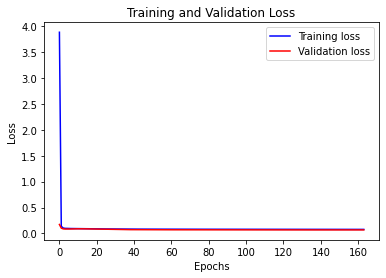

In [17]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [18]:
X_test = X_test.reshape(-1,1,5)

In [19]:
y_pred = model.predict(X_test)

predictValue = y_pred

trueValue = y_test


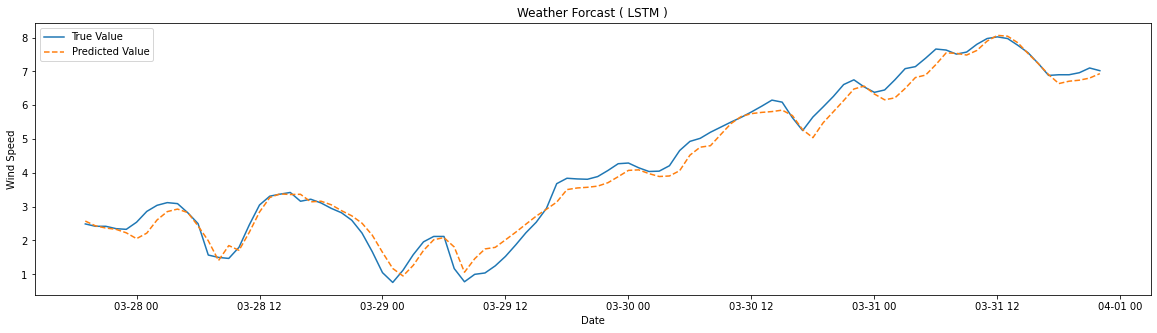

In [20]:
plt.figure(figsize=(20,5))

plt.title("Weather Forcast ( LSTM )")
plt.xlabel("Date")
plt.ylabel("Wind Speed")


plt.plot(date, trueValue)
plt.plot(date, predictValue, "--")

plt.legend(["True Value", "Predicted Value"])

plt.show()

In [21]:
mse = mean_squared_error(y_test, y_pred)
RMSE = math. sqrt(mse)
print( 'Root Mean Squared Error = ' , RMSE, '\n')

MAE = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error = ' , MAE, '\n')

R_squere = r2_score(y_test, y_pred)
print('R Squared Error = ' , R_squere, '\n')

MAPE = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error = ' , MAPE)

Root Mean Squared Error =  0.3046885027891153 

Mean Absolute Error =  0.23967234611511234 

R Squared Error =  0.9806846234767651 

Mean Absolute Percentage Error =  0.09518939955655883
